In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from IPython.display import set_matplotlib_formats, HTML, Image, display
from loaders import load_all_videos, load_thumbnails, each_thumbnail

%matplotlib inline
set_matplotlib_formats('svg')

def imshow(bgr):
    _,ret = cv2.imencode('.png', bgr)
    i = Image(data=ret)
    display(i)

In [2]:
vids = load_all_videos()
load_thumbnails(vids)

100%|██████████| 8607/8607 [00:01<00:00, 5630.61it/s]

Downloaded: 0
Broken links: 0
Already present: 7928
Skipped: 679


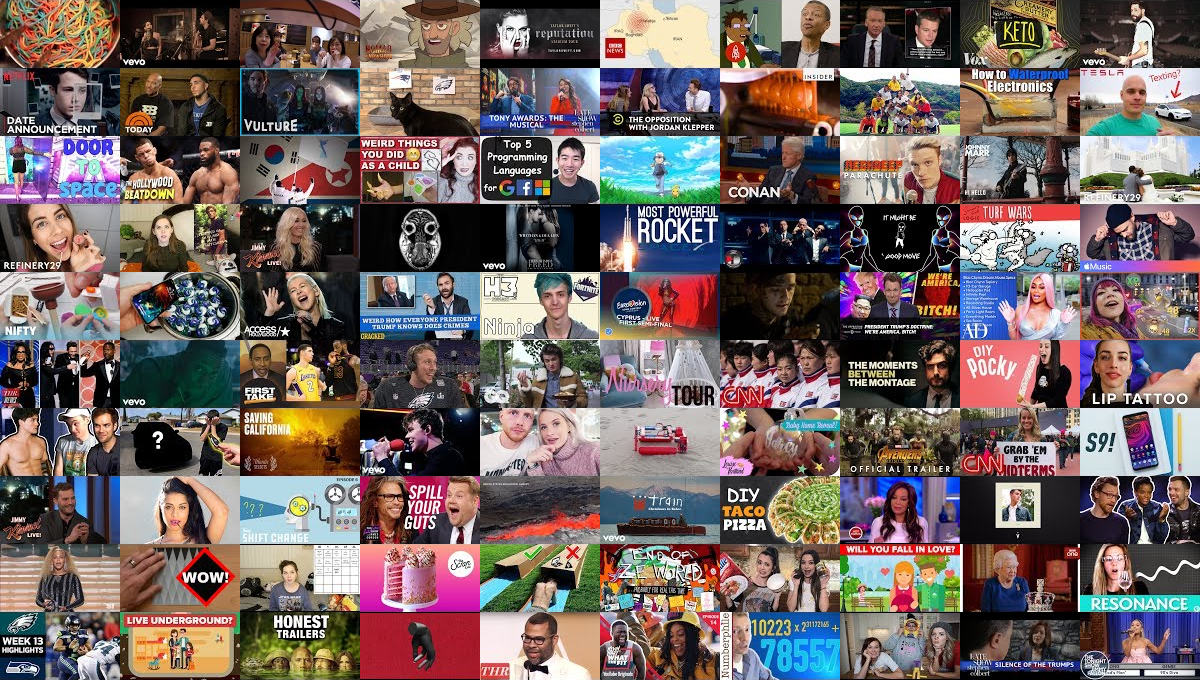

In [26]:
rows = 10
cols = 10
sample = list(each_thumbnail(rows * cols))
w, h, d = sample[0].shape
collage = np.array(sample).reshape(rows, cols, w, h, d).swapaxes(1, 2).reshape(rows * w, cols * h, d)
imshow(collage)

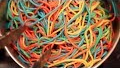

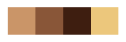

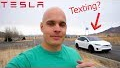

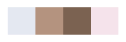

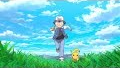

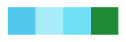

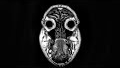

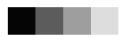

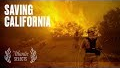

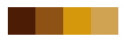

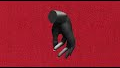

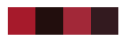

In [53]:
import PIL
import colorgram

test = [sample[i] for i in [0, 19, 25, 33, 62, 93]]

def extract_palette(bgr):
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    img = PIL.Image.fromarray(rgb)
    return colorgram.extract(img, 4)

def show_palette(palette):
    swatch = np.array([[list(color.rgb) for color in palette]])
    plt.figure(figsize=(2,8))
    plt.imshow(swatch)
    plt.axis('off')
    plt.show()

for image in test:
    palette = extract_palette(image)
    imshow(image)
    show_palette(palette)